# This file is used to test out functionality in scripts

## 1 - Let's test out the relative directory structure

In [1]:
import sys
sys.path.append("../scripts/twitter")
from searchTwitter import TwitterDataFrame, TwitterSearchTerm

## 2 - Let's test out TwitterSearchTerm

In [2]:
class Hospital():
    def __init__(self, name, lat, lon):
        self.name = name
        self.lat = lat
        self.lon = lon
        self.count = None
        
    def get_tweet_count(self,):
        query_term = f"-has:links lang:en -is:retweet has:geo point_radius:[{self.lon} {self.lat} 5mi] -has:media place_country:us"
        self.search = TwitterSearchTerm(query_term, "2018-01-01T00:00:00z","2019-01-01T00:00:00z")
        self.count = self.search.get_term_count()
        return self.count

In [3]:
f = Hospital("Frank R Howard Memorial Hospital", 39.42657865316148, -123.3289731870925)

In [4]:
f.get_tweet_count()

Total tweets for query -has:links lang:en -is:retweet has:geo point_radius:[-123.3289731870925 39.42657865316148 5mi] -has:media place_country:us :
1450


,end,start,tweet_count
0,2018-12-02T00:00:00.000Z,2018-12-01T00:00:00.000Z,5
1,2018-12-03T00:00:00.000Z,2018-12-02T00:00:00.000Z,21
2,2018-12-04T00:00:00.000Z,2018-12-03T00:00:00.000Z,1
3,2018-12-05T00:00:00.000Z,2018-12-04T00:00:00.000Z,4
4,2018-12-06T00:00:00.000Z,2018-12-05T00:00:00.000Z,1
...,...,...,...
19,2018-01-21T00:00:00.000Z,2018-01-20T00:00:00.000Z,2
20,2018-01-22T00:00:00.000Z,2018-01-21T00:00:00.000Z,5
21,2018-01-23T00:00:00.000Z,2018-01-22T00:00:00.000Z,4
22,2018-01-24T00:00:00.000Z,2018-01-23T00:00:00.000Z,2


In [5]:
df = f.search.get_tweets()

Making request 1 of 3
Making request 2 of 3
Making request 3 of 3
Query finished


## 3 - Let's test out this new TwitterDataFrame package


In [6]:
df = TwitterDataFrame(df)

In [7]:
print(len(df))
print(df.get_coords())


1450
{'lat': (39.376929, 39.4230571), 'lon': (-123.402512, -123.3483657836914)}


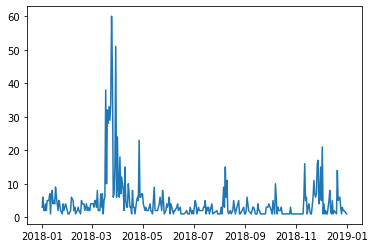

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.count_by_day())

In [9]:
new_df = df.zoom_in((39.4,39.5),(-123.4,-123.5))

In [10]:
print(len(new_df))
new_df.get_coords()

190


{'lat': (39.4230571, 39.4230571), 'lon': (-123.402512, -123.402512)}